# Signaux III : projet detection de claviers

## **1. Prétraitement d’image**

**Objectif :** obtenir une image claire, binarisée et prête pour l’analyse des touches.

Étapes :

1. **Conversion en niveaux de gris** → `img_gray = rgb2gray(img)`
2. **Réduction de bruit** : filtre moyenneur ou médian.
3. **Amélioration du contraste** : histogramme égalisé.
4. **Seuillage automatique** (Otsu ou manuel) → `img_bin`.
5. **Morphologie** :

    - `ouverture` pour enlever les petits points.
    - `fermeture` pour combler les trous dans les touches.

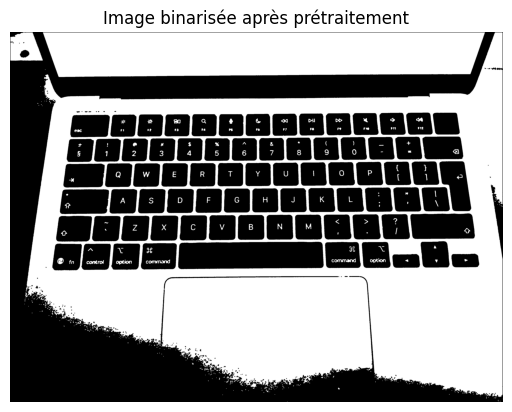

In [1]:
# Importer les dépendances
import os, sys
import matplotlib.pyplot as plt
from skimage import io

# Ajouter le répertoire parent au chemin Python pour que 'src' puisse être trouvé
sys.path.append(os.path.abspath('..'))

# Importer la fonction de prétraitement depuis preprocessing.py
from src.preprocessing import pretraiter_image

# Charger l’image d’entrée et appliquer le prétraitement pour obtenir une image binaire
chemin_image = '../data/img/INT-qwerty-1.jpg'
binaire = pretraiter_image(io.imread(chemin_image))

# Afficher l’image binaire résultante en niveaux de gris
plt.imshow(binaire, cmap='gray')
plt.title('Image binarisée après prétraitement')
plt.axis('off')
plt.show()

>À ce stade : on obtient une image “noir et blanc” où chaque touche est une forme isolée.

---

## **2. Détection des touches individuelles**

**Objectif :** repérer les touches et extraire leur géométrie.

- **Contours** : appliquer un algorithme de recherche de composantes connexes ou de contours (implémenté à la main si besoin).
- **Filtrage des régions** :

    - Supprimer les très petites ou très grandes (bruit, bords du clavier).
    - Garder les rectangles approximatifs.
- **Approximation rectangulaire** : calculer le rectangle englobant chaque touche.
- **Visualisation** : afficher les bounding boxes pour vérification.

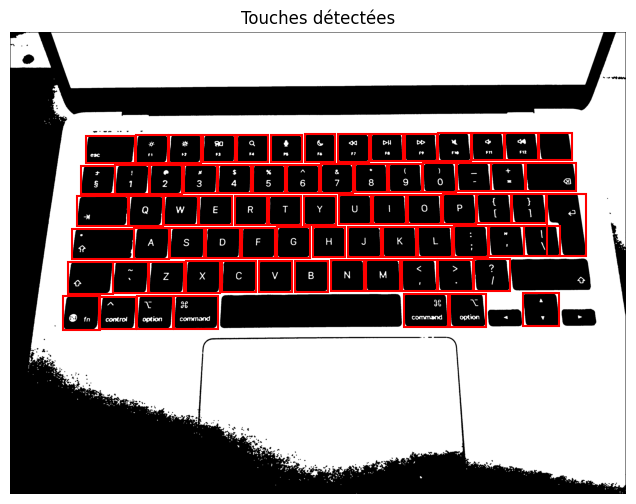

In [2]:
from src.key_detection import detecter_touches

boites_touches = detecter_touches(binaire)

plt.figure(figsize=(10, 6))
plt.imshow(binaire, cmap='gray')
for bbox in boites_touches:
    minr, minc, maxr, maxc = bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                         edgecolor='red', facecolor='none', linewidth=1.5)
    plt.gca().add_patch(rect)
plt.axis('off')
plt.title("Touches détectées")
plt.show()

---

## **3. Reconstruction de la grille**

**Objectif :** organiser les touches en lignes et colonnes.

- Trier les touches selon leur coordonnée `y` pour regrouper par ligne.
- Calculer la moyenne de `y` dans chaque groupe → lignes du clavier.
- Trier ensuite dans chaque ligne par coordonnée `x`.
- Représenter la structure comme une matrice de symboles (touches).


Ligne 0 : 14 touches
  [0] bbox=(677, 494, 860, 816), dim=(322x183)
  [1] bbox=(675, 822, 857, 1034), dim=(212x182)
  [2] bbox=(674, 1042, 854, 1252), dim=(210x180)
  [3] bbox=(673, 1264, 853, 1472), dim=(208x180)
  [4] bbox=(672, 1486, 852, 1691), dim=(205x180)
  [5] bbox=(671, 1707, 851, 1909), dim=(202x180)
  [6] bbox=(669, 1928, 850, 2129), dim=(201x181)
  [7] bbox=(668, 2146, 849, 2349), dim=(203x181)
  [8] bbox=(666, 2365, 846, 2570), dim=(205x180)
  [9] bbox=(664, 2583, 844, 2792), dim=(209x180)
  [10] bbox=(663, 2803, 842, 3014), dim=(211x179)
  [11] bbox=(660, 3022, 840, 3236), dim=(214x180)
  [12] bbox=(659, 3241, 839, 3457), dim=(216x180)
  [13] bbox=(660, 3459, 838, 3678), dim=(219x178)
Ligne 1 : 14 touches
  [0] bbox=(874, 464, 1063, 686), dim=(222x189)
  [1] bbox=(872, 688, 1060, 907), dim=(219x188)
  [2] bbox=(871, 914, 1057, 1128), dim=(214x186)
  [3] bbox=(870, 1138, 1055, 1352), dim=(214x185)
  [4] bbox=(869, 1364, 1054, 1575), dim=(211x185)
  [5] bbox=(869, 1590, 105

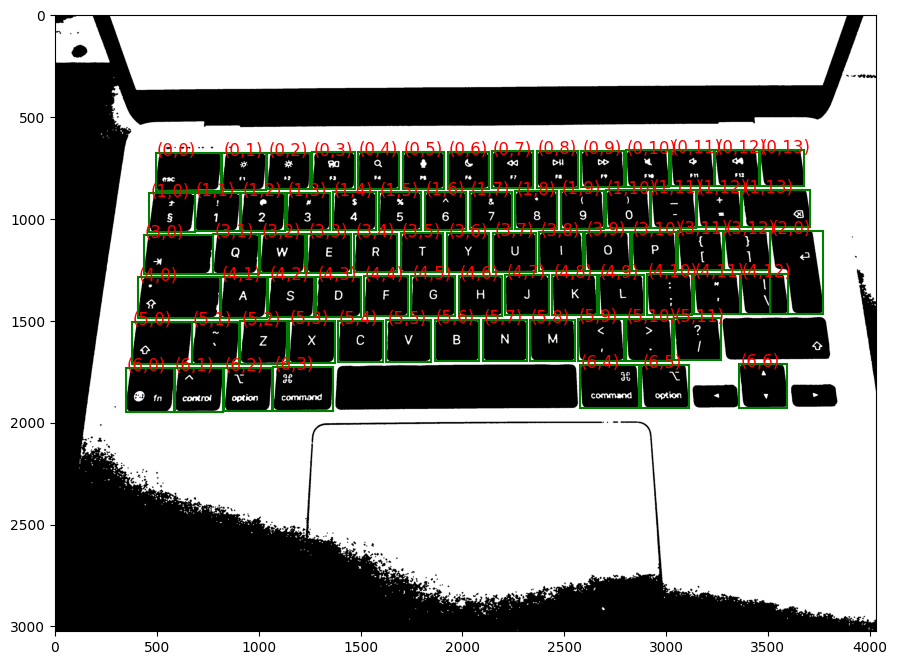

In [3]:
from src.construct_grid import reconstruire_grille, afficher_grille

# Reconstruire la grille à partir des boites de touches détectées
grille = reconstruire_grille(boites_touches, seuil_y=50)

# Afficher des informations sur la grille
afficher_grille(grille)

# Visualiser : afficher la grille sur l'image
plt.figure(figsize=(12, 8))
plt.imshow(binaire, cmap='gray')

for num_ligne, ligne in enumerate(grille):
    for num_col, touche in enumerate(ligne):
        minr, minc, maxr, maxc = touche["bbox"]
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                             edgecolor='green', facecolor='none', linewidth=1.5)
        plt.gca().add_patch(rect)
        # Ajouter le numéro de la touche
        plt.text(minc + 5, minr + 15, f"({num_ligne},{num_col})", 
                color='red', fontsize=12)

print(f"Grille : {len(grille)} lignes")
for i, ligne in enumerate(grille):
    print(f"  Ligne {i} : {len(ligne)} touches")

🎯 Extraction interactive des templates
Pour chaque touche, tapez le caractère correspondant
Les caractères spéciaux seront automatiquement convertis
Commandes : 'skip' (ignorer), 'stop' (arrêter), 'list' (voir templates)
------------------------------------------------------------


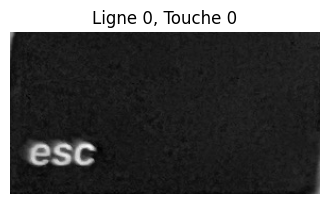

Label pour Ligne 0, Touche 0 (ou skip/stop/list):  esc


  ✓ Sauvegardé : templates/esc.png



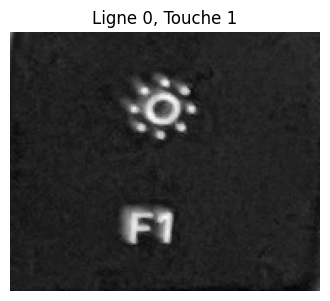

Label pour Ligne 0, Touche 1 (ou skip/stop/list):  F1


  ✓ Sauvegardé : templates/F1.png



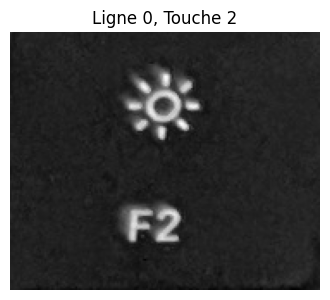

Label pour Ligne 0, Touche 2 (ou skip/stop/list):  F2


  ✓ Sauvegardé : templates/F2.png



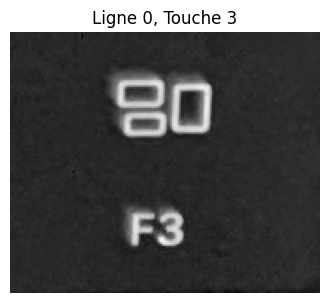

Label pour Ligne 0, Touche 3 (ou skip/stop/list):  F3


  ✓ Sauvegardé : templates/F3.png



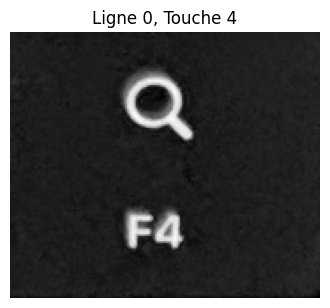

Label pour Ligne 0, Touche 4 (ou skip/stop/list):  F4


  ✓ Sauvegardé : templates/F4.png



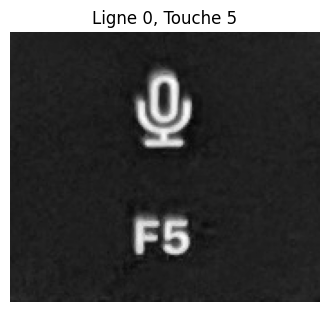

Label pour Ligne 0, Touche 5 (ou skip/stop/list):  F5


  ✓ Sauvegardé : templates/F5.png



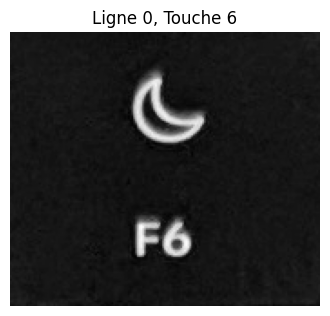

Label pour Ligne 0, Touche 6 (ou skip/stop/list):  F6


  ✓ Sauvegardé : templates/F6.png



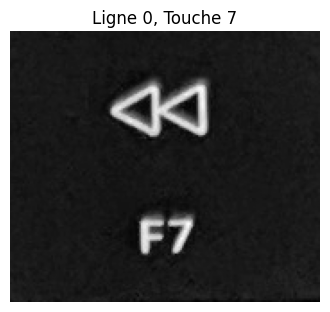

Label pour Ligne 0, Touche 7 (ou skip/stop/list):  F7


  ✓ Sauvegardé : templates/F7.png



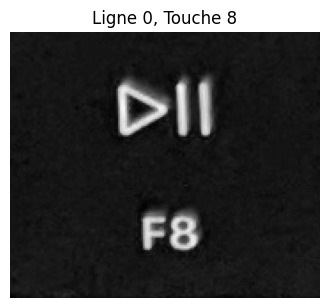

Label pour Ligne 0, Touche 8 (ou skip/stop/list):  F8


  ✓ Sauvegardé : templates/F8.png



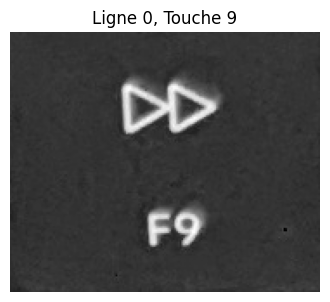

Label pour Ligne 0, Touche 9 (ou skip/stop/list):  F9


  ✓ Sauvegardé : templates/F9.png



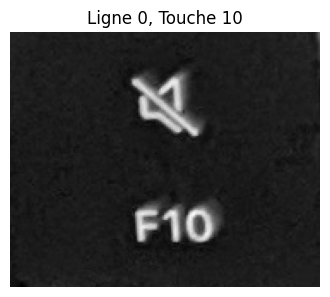

Label pour Ligne 0, Touche 10 (ou skip/stop/list):  F10


  ✓ Sauvegardé : templates/F10.png



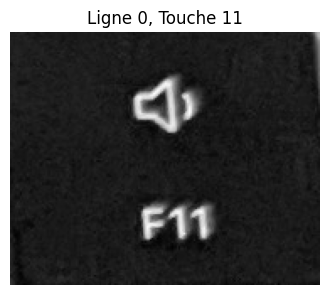

Label pour Ligne 0, Touche 11 (ou skip/stop/list):  F11


  ✓ Sauvegardé : templates/F11.png



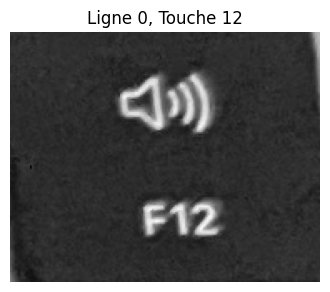

Label pour Ligne 0, Touche 12 (ou skip/stop/list):  F12


  ✓ Sauvegardé : templates/F12.png



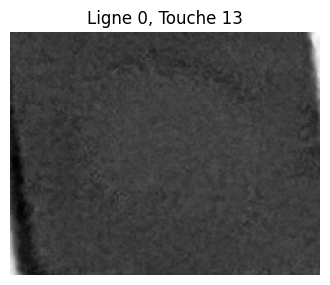

Label pour Ligne 0, Touche 13 (ou skip/stop/list):  skip


  ⊘ Ignoré



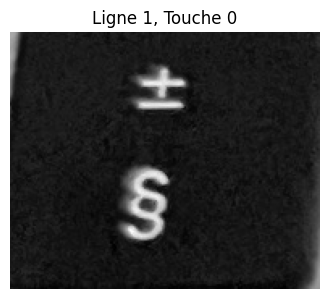

Label pour Ligne 1, Touche 0 (ou skip/stop/list):  §


  ✓ '§' sauvegardé comme '_.png'



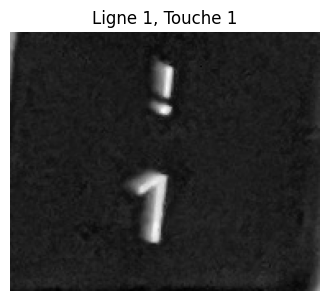

Label pour Ligne 1, Touche 1 (ou skip/stop/list):  1


  ✓ Sauvegardé : templates/1.png



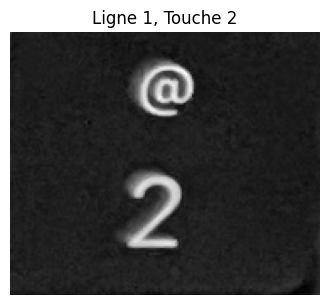

Label pour Ligne 1, Touche 2 (ou skip/stop/list):  2


  ✓ Sauvegardé : templates/2.png



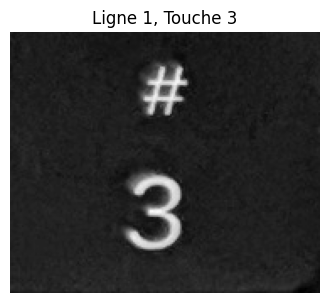

Label pour Ligne 1, Touche 3 (ou skip/stop/list):  3


  ✓ Sauvegardé : templates/3.png



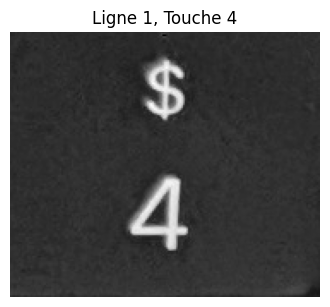

Label pour Ligne 1, Touche 4 (ou skip/stop/list):  4


  ✓ Sauvegardé : templates/4.png



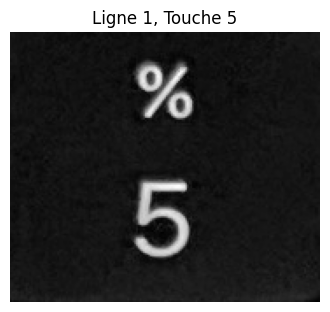

Label pour Ligne 1, Touche 5 (ou skip/stop/list):  5


  ✓ Sauvegardé : templates/5.png



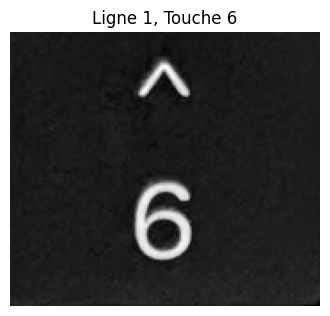

Label pour Ligne 1, Touche 6 (ou skip/stop/list):  6


  ✓ Sauvegardé : templates/6.png



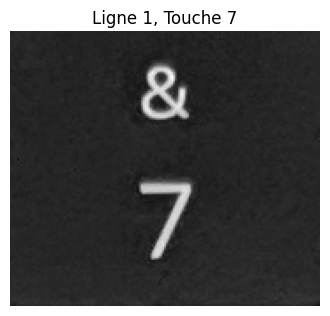

Label pour Ligne 1, Touche 7 (ou skip/stop/list):  7


  ✓ Sauvegardé : templates/7.png



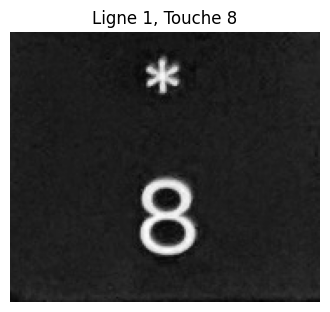

Label pour Ligne 1, Touche 8 (ou skip/stop/list):  8


  ✓ Sauvegardé : templates/8.png



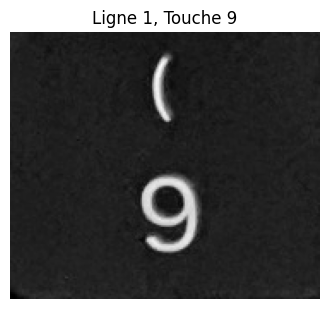

Label pour Ligne 1, Touche 9 (ou skip/stop/list):  9


  ✓ Sauvegardé : templates/9.png



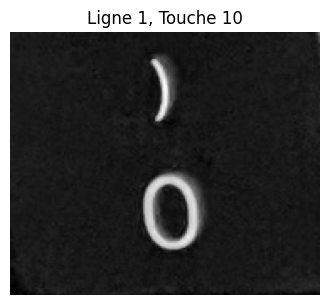

Label pour Ligne 1, Touche 10 (ou skip/stop/list):  0


  ✓ Sauvegardé : templates/0.png



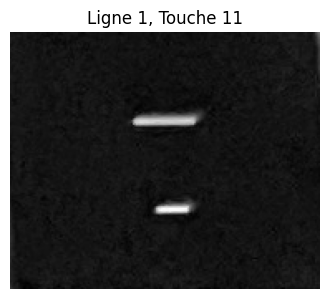

Label pour Ligne 1, Touche 11 (ou skip/stop/list):  -


  ✓ '-' sauvegardé comme 'minus.png'



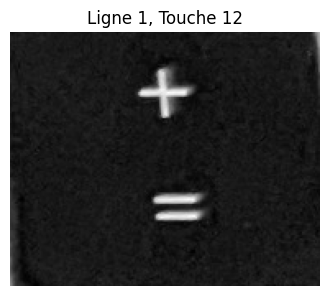

Label pour Ligne 1, Touche 12 (ou skip/stop/list):  =


  ✓ '=' sauvegardé comme 'equal.png'



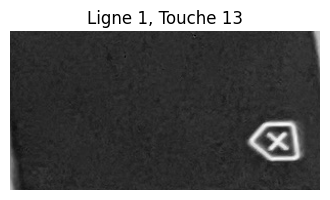

Label pour Ligne 1, Touche 13 (ou skip/stop/list):  skip


  ⊘ Ignoré



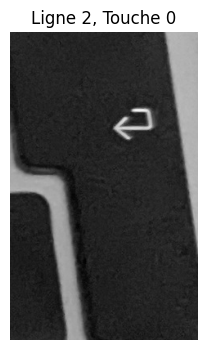

Label pour Ligne 2, Touche 0 (ou skip/stop/list):  skip


  ⊘ Ignoré



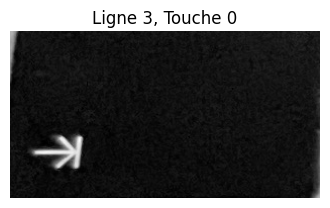

Label pour Ligne 3, Touche 0 (ou skip/stop/list):  skip


  ⊘ Ignoré



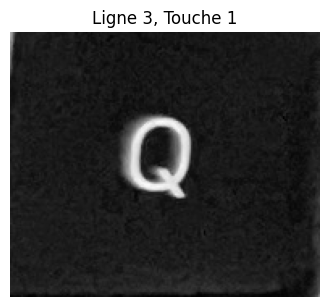

Label pour Ligne 3, Touche 1 (ou skip/stop/list):  Q


  ✓ Sauvegardé : templates/Q.png



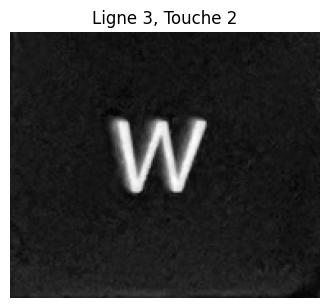

Label pour Ligne 3, Touche 2 (ou skip/stop/list):  W


  ✓ Sauvegardé : templates/W.png



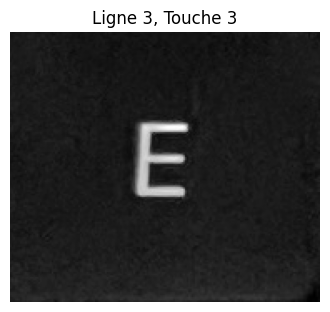

Label pour Ligne 3, Touche 3 (ou skip/stop/list):  E


  ✓ Sauvegardé : templates/E.png



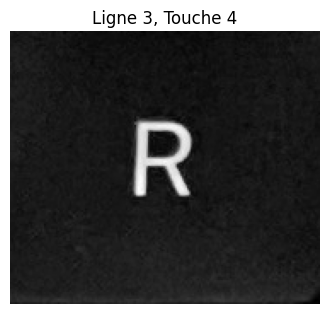

Label pour Ligne 3, Touche 4 (ou skip/stop/list):  R


  ✓ Sauvegardé : templates/R.png



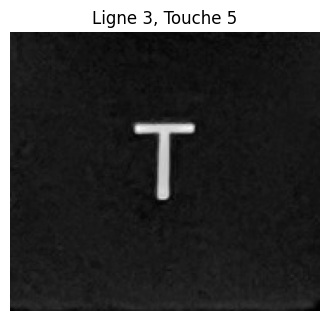

Label pour Ligne 3, Touche 5 (ou skip/stop/list):  T


  ✓ Sauvegardé : templates/T.png



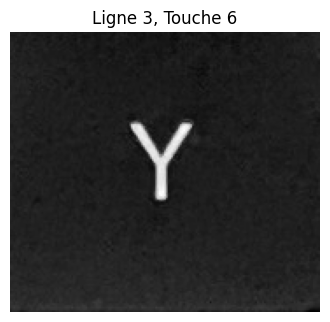

Label pour Ligne 3, Touche 6 (ou skip/stop/list):  Y


  ✓ Sauvegardé : templates/Y.png



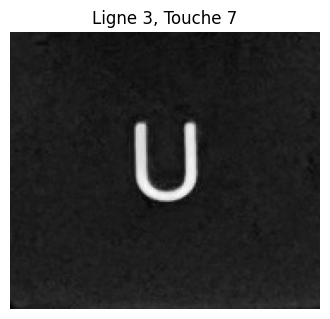

Label pour Ligne 3, Touche 7 (ou skip/stop/list):  U


  ✓ Sauvegardé : templates/U.png



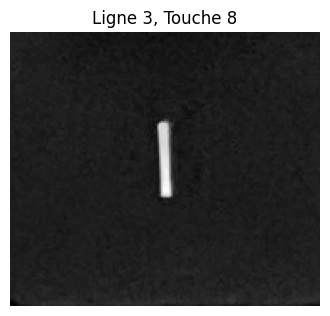

Label pour Ligne 3, Touche 8 (ou skip/stop/list):  I


  ✓ Sauvegardé : templates/I.png



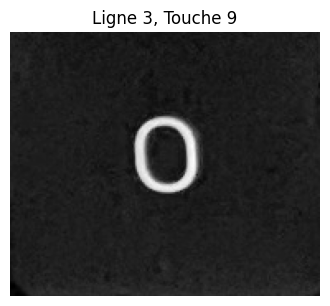

Label pour Ligne 3, Touche 9 (ou skip/stop/list):  O


  ✓ Sauvegardé : templates/O.png



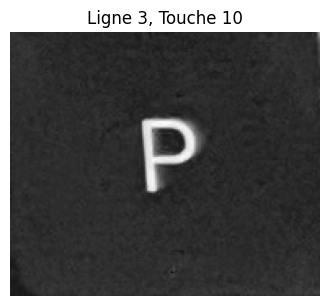

Label pour Ligne 3, Touche 10 (ou skip/stop/list):  P


  ✓ Sauvegardé : templates/P.png



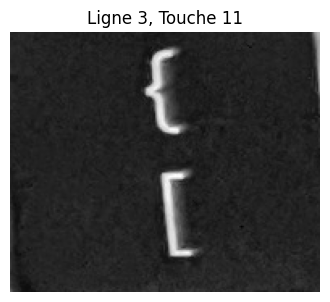

Label pour Ligne 3, Touche 11 (ou skip/stop/list):  [


  ✓ '[' sauvegardé comme 'bracket_left.png'



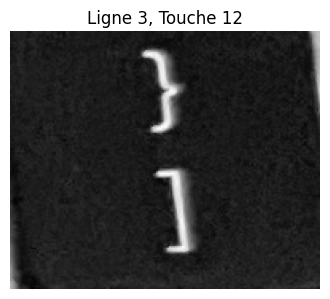

Label pour Ligne 3, Touche 12 (ou skip/stop/list):  ]


  ✓ ']' sauvegardé comme 'bracket_right.png'



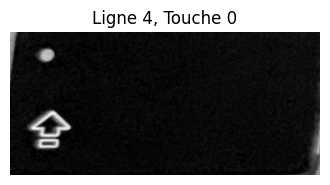

Label pour Ligne 4, Touche 0 (ou skip/stop/list):  skip


  ⊘ Ignoré



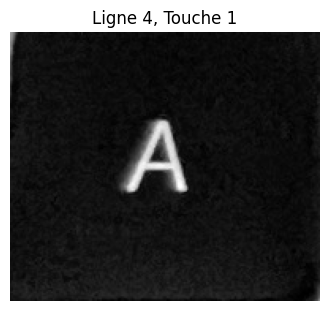

Label pour Ligne 4, Touche 1 (ou skip/stop/list):  A


  ✓ Sauvegardé : templates/A.png



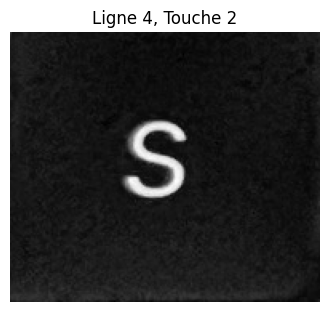

Label pour Ligne 4, Touche 2 (ou skip/stop/list):  S


  ✓ Sauvegardé : templates/S.png



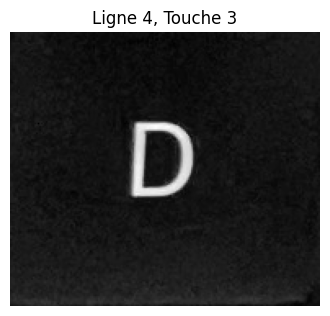

Label pour Ligne 4, Touche 3 (ou skip/stop/list):  D


  ✓ Sauvegardé : templates/D.png



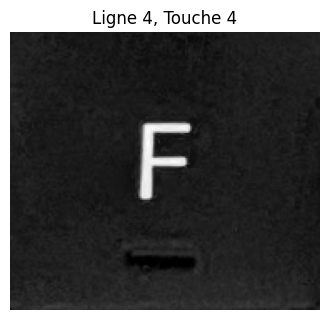

Label pour Ligne 4, Touche 4 (ou skip/stop/list):  F


  ✓ Sauvegardé : templates/F.png



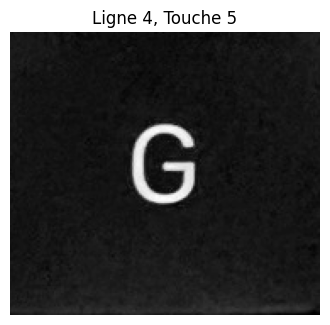

Label pour Ligne 4, Touche 5 (ou skip/stop/list):  G


  ✓ Sauvegardé : templates/G.png



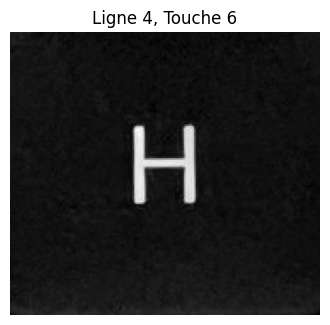

Label pour Ligne 4, Touche 6 (ou skip/stop/list):  H


  ✓ Sauvegardé : templates/H.png



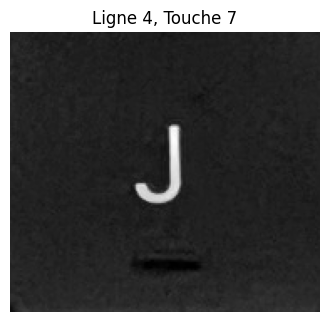

Label pour Ligne 4, Touche 7 (ou skip/stop/list):  J


  ✓ Sauvegardé : templates/J.png



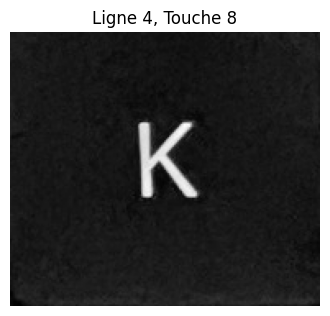

Label pour Ligne 4, Touche 8 (ou skip/stop/list):  K


  ✓ Sauvegardé : templates/K.png



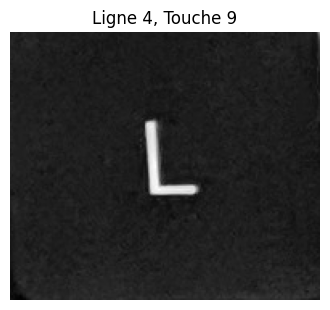

Label pour Ligne 4, Touche 9 (ou skip/stop/list):  L


  ✓ Sauvegardé : templates/L.png



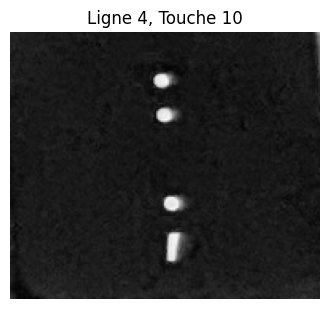

Label pour Ligne 4, Touche 10 (ou skip/stop/list):  ;


  ✓ ';' sauvegardé comme 'semicolon.png'



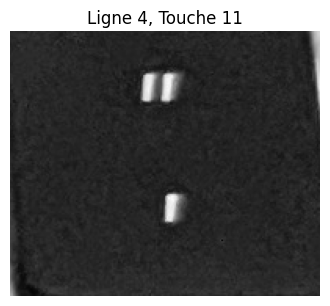

Label pour Ligne 4, Touche 11 (ou skip/stop/list):  '


  ✓ ''' sauvegardé comme 'quote_single.png'



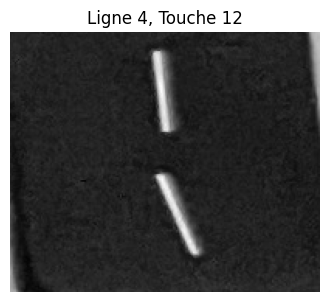

Label pour Ligne 4, Touche 12 (ou skip/stop/list):  \


  ✓ '\' sauvegardé comme 'backslash.png'



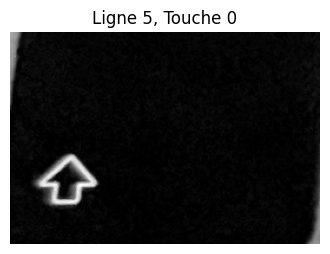

Label pour Ligne 5, Touche 0 (ou skip/stop/list):  skip


  ⊘ Ignoré



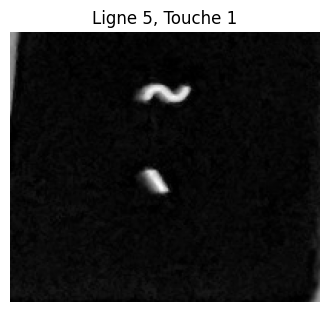

Label pour Ligne 5, Touche 1 (ou skip/stop/list):  `


  ✓ '`' sauvegardé comme 'backtick.png'



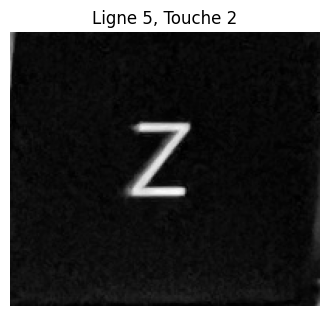

Label pour Ligne 5, Touche 2 (ou skip/stop/list):  Z


  ✓ Sauvegardé : templates/Z.png



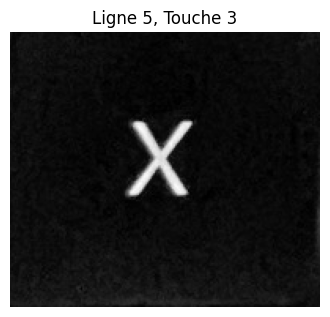

Label pour Ligne 5, Touche 3 (ou skip/stop/list):  X


  ✓ Sauvegardé : templates/X.png



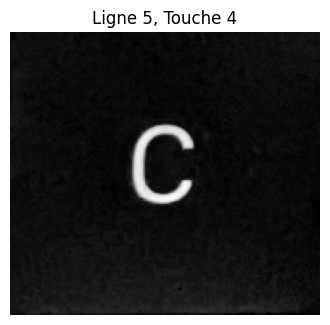

Label pour Ligne 5, Touche 4 (ou skip/stop/list):  C


  ✓ Sauvegardé : templates/C.png



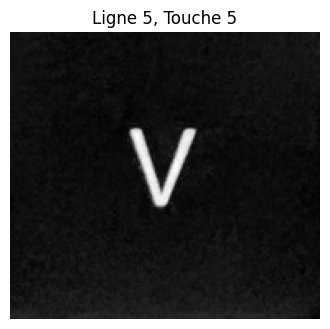

Label pour Ligne 5, Touche 5 (ou skip/stop/list):  V


  ✓ Sauvegardé : templates/V.png



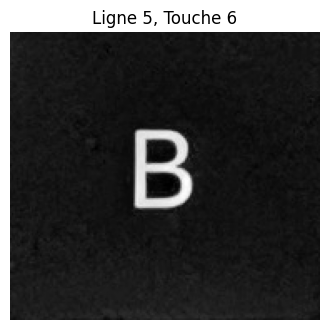

Label pour Ligne 5, Touche 6 (ou skip/stop/list):  B


  ✓ Sauvegardé : templates/B.png



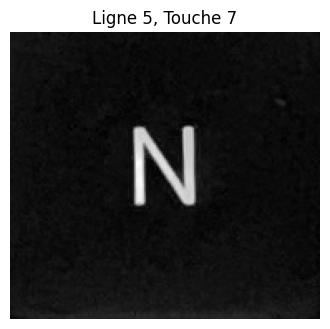

Label pour Ligne 5, Touche 7 (ou skip/stop/list):  N


  ✓ Sauvegardé : templates/N.png



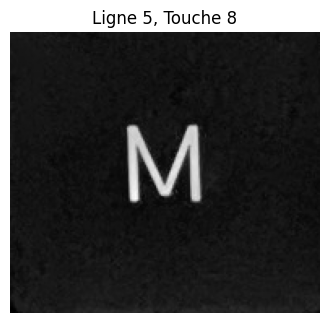

Label pour Ligne 5, Touche 8 (ou skip/stop/list):  M


  ✓ Sauvegardé : templates/M.png



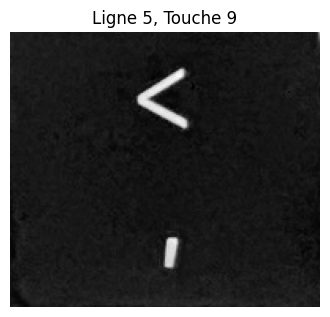

Label pour Ligne 5, Touche 9 (ou skip/stop/list):  ,


  ✓ ',' sauvegardé comme 'comma.png'



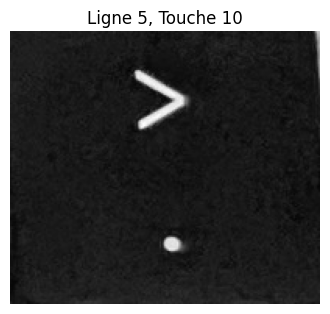

Label pour Ligne 5, Touche 10 (ou skip/stop/list):  .


  ✓ '.' sauvegardé comme 'period.png'



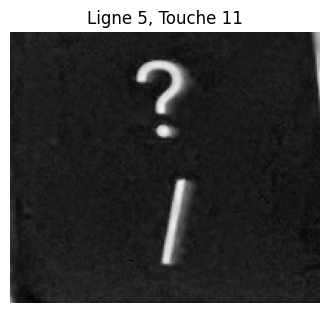

Label pour Ligne 5, Touche 11 (ou skip/stop/list):  /


  ✓ '/' sauvegardé comme 'slash.png'



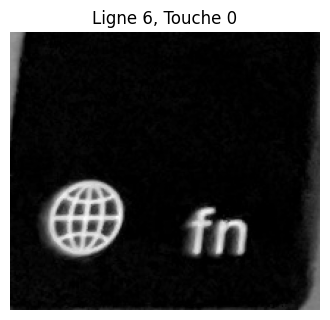

Label pour Ligne 6, Touche 0 (ou skip/stop/list):  fn


  ✓ Sauvegardé : templates/fn.png



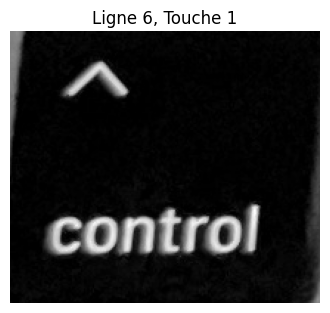

Label pour Ligne 6, Touche 1 (ou skip/stop/list):  control


  ✓ Sauvegardé : templates/control.png



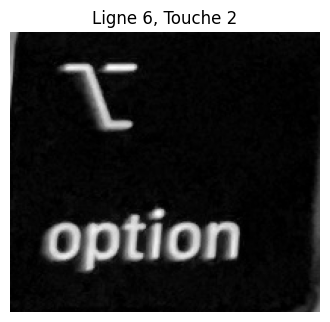

Label pour Ligne 6, Touche 2 (ou skip/stop/list):  option


  ✓ Sauvegardé : templates/option.png



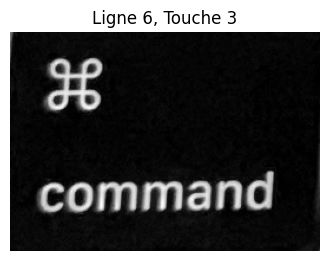

Label pour Ligne 6, Touche 3 (ou skip/stop/list):  command


  ✓ Sauvegardé : templates/command.png



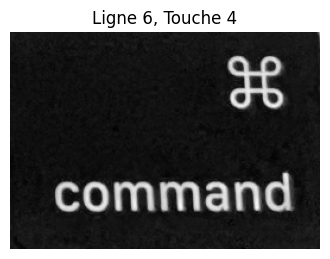

Label pour Ligne 6, Touche 4 (ou skip/stop/list):  command


  ⚠️  'command.png' existe déjà


     Écraser ? (o/n):  n


  ⊘ Non sauvegardé



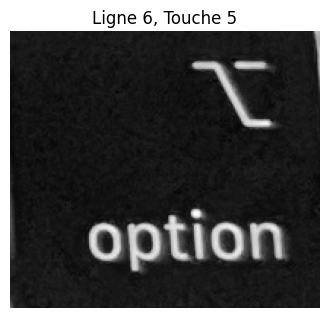

Label pour Ligne 6, Touche 5 (ou skip/stop/list):  option


  ⚠️  'option.png' existe déjà


     Écraser ? (o/n):  n


  ⊘ Non sauvegardé



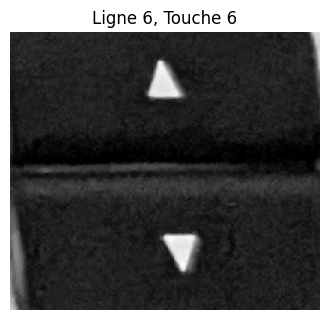

Label pour Ligne 6, Touche 6 (ou skip/stop/list):  skip


  ⊘ Ignoré


✓✓✓ Extraction terminée ! 65 templates créés

📊 Résumé : 65 templates créés


In [4]:
# ============================================================
# PARTIE 4a : EXTRACTION DES TEMPLATES (DEPUIS LE DÉBUT)
# ============================================================

from skimage import color
from src.template_extraction import extraire_templates_interactif

# Charger l'image en niveaux de gris (PAS binaire!)
img_originale = io.imread('../data/img/INT-qwerty-1.jpg')
img_grise = color.rgb2gray(img_originale)

# Lancer l'extraction interactive DEPUIS LE DÉBUT
templates = extraire_templates_interactif(
    img_grise, 
    grille, 
    dossier_templates='templates',
    start_ligne=0,   # ✅ Depuis le début
    start_col=0      # ✅ Depuis le début
)

print(f"\n📊 Résumé : {len(templates)} templates créés")

📂 Chargement des templates...
✓ Template chargé: '0'
✓ Template chargé: '1'
✓ Template chargé: '2'
✓ Template chargé: '3'
✓ Template chargé: '4'
✓ Template chargé: '5'
✓ Template chargé: '6'
✓ Template chargé: '7'
✓ Template chargé: '8'
✓ Template chargé: '9'
✓ Template chargé: 'A'
✓ Template chargé: 'B'
✓ Template chargé: 'C'
✓ Template chargé: 'D'
✓ Template chargé: 'E'
✓ Template chargé: 'F'
✓ Template chargé: 'F1'
✓ Template chargé: 'F10'
✓ Template chargé: 'F11'
✓ Template chargé: 'F12'
✓ Template chargé: 'F2'
✓ Template chargé: 'F3'
✓ Template chargé: 'F4'
✓ Template chargé: 'F5'
✓ Template chargé: 'F6'
✓ Template chargé: 'F7'
✓ Template chargé: 'F8'
✓ Template chargé: 'F9'
✓ Template chargé: 'G'
✓ Template chargé: 'H'
✓ Template chargé: 'I'
✓ Template chargé: 'J'
✓ Template chargé: 'K'
✓ Template chargé: 'L'
✓ Template chargé: 'M'
✓ Template chargé: 'N'
✓ Template chargé: 'O'
✓ Template chargé: 'P'
✓ Template chargé: 'Q'
✓ Template chargé: 'R'
✓ Template chargé: 'S'
✓ Template c

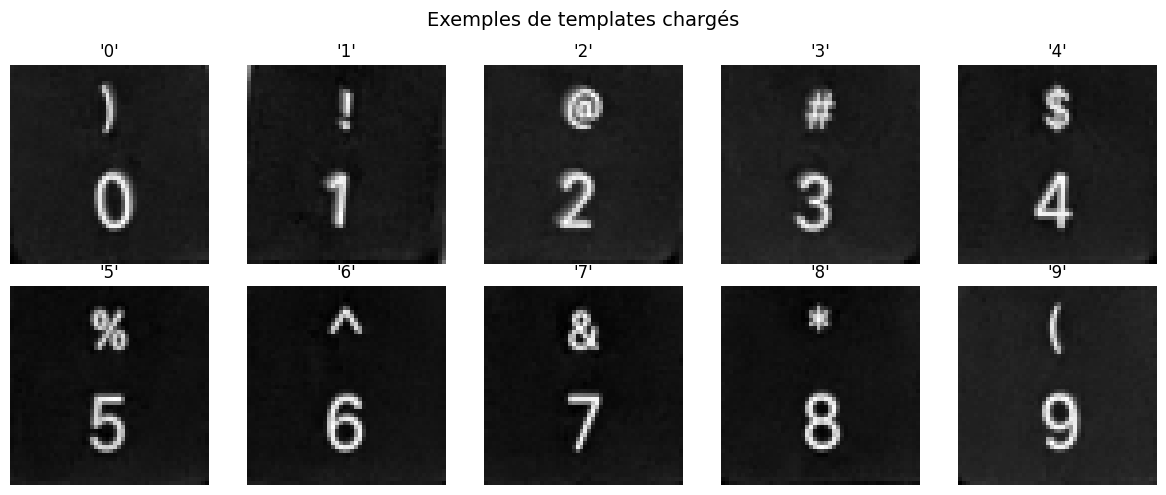


🔍 Reconnaissance des caractères...

📍 Ligne 0 (14 touches):
  ✓ [ 0] 'esc' (confiance: 1.000)
  ✓ [ 1] 'F1' (confiance: 1.000)
  ✓ [ 2] 'F2' (confiance: 1.000)
  ✓ [ 3] 'F3' (confiance: 1.000)
  ✓ [ 4] 'F4' (confiance: 1.000)
  ✓ [ 5] 'F5' (confiance: 1.000)
  ✓ [ 6] 'F6' (confiance: 1.000)
  ✓ [ 7] 'F7' (confiance: 1.000)
  ✓ [ 8] 'F8' (confiance: 1.000)
  ✓ [ 9] 'F9' (confiance: 1.000)
  ✓ [10] 'F10' (confiance: 1.000)
  ✓ [11] 'F11' (confiance: 1.000)
  ✓ [12] 'F12' (confiance: 1.000)
  ✓ [13] 'backslash' (confiance: 0.382)

📍 Ligne 1 (14 touches):
  ✓ [ 0] '_' (confiance: 1.000)
  ✓ [ 1] '1' (confiance: 1.000)
  ✓ [ 2] '2' (confiance: 1.000)
  ✓ [ 3] '3' (confiance: 1.000)
  ✓ [ 4] '4' (confiance: 1.000)
  ✓ [ 5] '5' (confiance: 1.000)
  ✓ [ 6] '6' (confiance: 1.000)
  ✓ [ 7] '7' (confiance: 1.000)
  ✓ [ 8] '8' (confiance: 1.000)
  ✓ [ 9] '9' (confiance: 1.000)
  ✓ [10] '0' (confiance: 1.000)
  ✓ [11] 'minus' (confiance: 1.000)
  ✓ [12] 'equal' (confiance: 1.000)
  ✗ [13] '?' (con

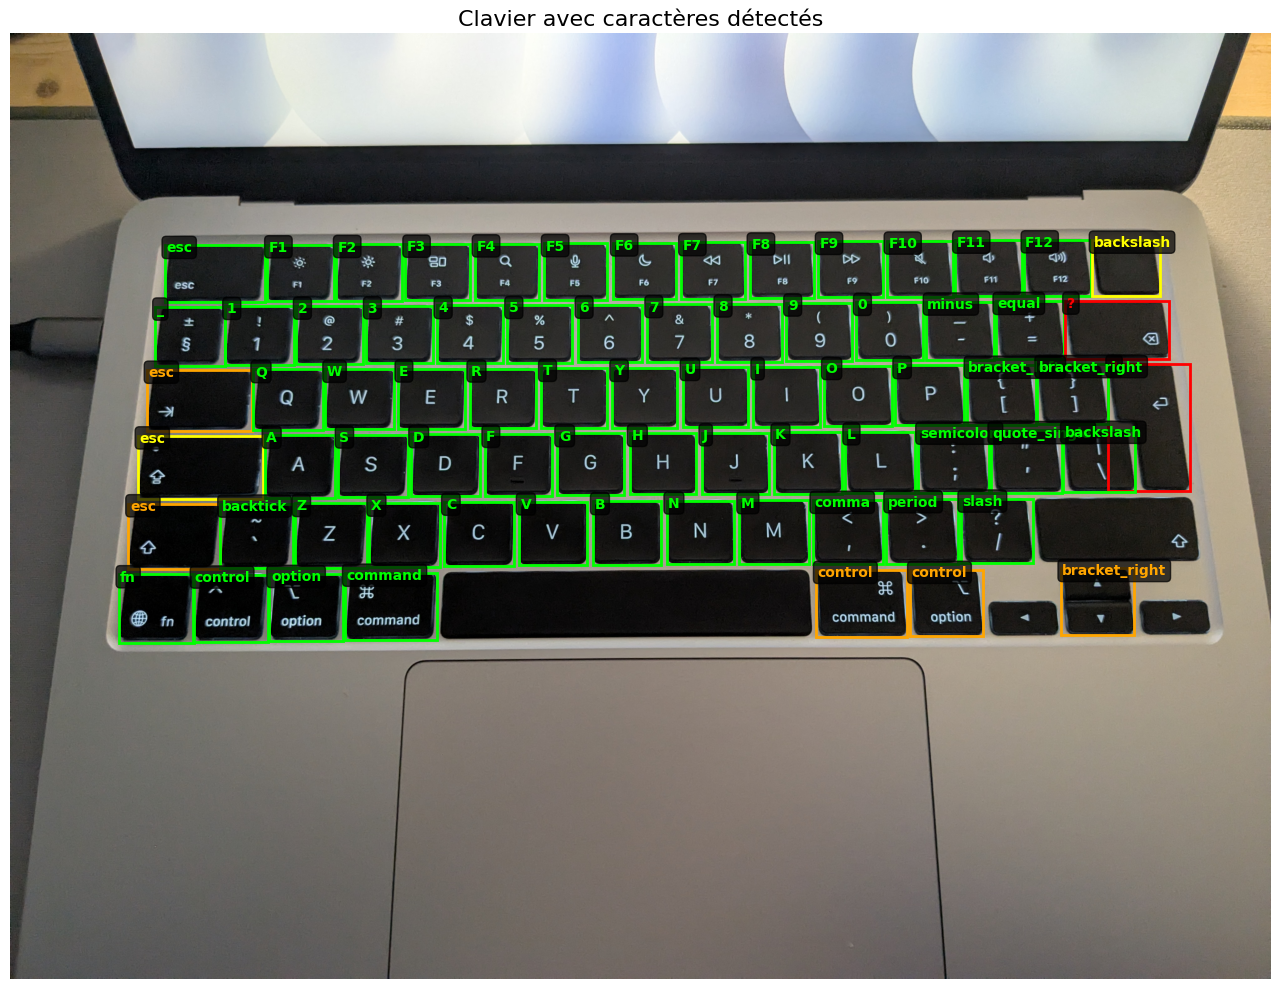


⌨️  LAYOUT CLAVIER DÉTECTÉ :
Ligne 0: esc | F1 | F2 | F3 | F4 | F5 | F6 | F7 | F8 | F9 | F10 | F11 | F12 | backslash
Ligne 1: _ | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 0 | minus | equal | ?
Ligne 2: ?
Ligne 3: esc | Q | W | E | R | T | Y | U | I | O | P | bracket_left | bracket_right
Ligne 4: esc | A | S | D | F | G | H | J | K | L | semicolon | quote_single | backslash
Ligne 5: esc | backtick | Z | X | C | V | B | N | M | comma | period | slash
Ligne 6: fn | control | option | command | control | control | bracket_right

📈 STATISTIQUES :
  Total de touches : 74
  Touches reconnues : 72
  Taux de reconnaissance : 97.3%
  Confiance moyenne : 0.950

✓ Layout exporté dans 'keyboard_layout_detected.txt'

🎉 RECONNAISSANCE TERMINÉE !


In [5]:
# ============================================================
# PARTIE 4b : RECONNAISSANCE DES CARACTÈRES
# ============================================================

from src.character_recognition import (
    charger_templates,
    remplir_grille_avec_caracteres,
    exporter_layout_clavier
)
from matplotlib.patches import Rectangle

# 1. Charger les templates
print("📂 Chargement des templates...")
templates = charger_templates('templates/', taille=(50, 50))

if not templates:
    print("❌ ERREUR : Aucun template trouvé!")
else:
    print(f"✓ {len(templates)} templates chargés")
    print(f"  Caractères : {list(templates.keys())[:20]}...")
    
    # Visualiser quelques templates
    fig, axes = plt.subplots(2, 5, figsize=(12, 5))
    fig.suptitle('Exemples de templates chargés', fontsize=14)
    
    for ax, (char, template) in zip(axes.flat, list(templates.items())[:10]):
        ax.imshow(template, cmap='gray')
        ax.set_title(f"'{char}'", fontsize=12)
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # 2. Reconnaissance sur la grille
    print("\n🔍 Reconnaissance des caractères...")
    
    grille_complete = remplir_grille_avec_caracteres(
        img_grise,
        grille,
        templates,
        seuil_confiance=0.3,
        verbose=True
    )
    
    # 3. Visualisation des résultats
    print("\n📊 Visualisation des résultats...")
    
    fig, ax = plt.subplots(1, 1, figsize=(16, 10))
    ax.imshow(img_originale)
    ax.set_title('Clavier avec caractères détectés', fontsize=16)
    
    for i, ligne in enumerate(grille_complete):
        for j, touche in enumerate(ligne):
            bbox = touche['bbox']
            char = touche.get('char', '?')
            confiance = touche.get('confiance', 0.0)
            
            minr, minc, maxr, maxc = bbox
            
            # Couleur selon la confiance
            if char is None:
                color = 'red'
            elif confiance > 0.7:
                color = 'lime'
            elif confiance > 0.4:
                color = 'orange'
            else:
                color = 'yellow'
            
            rect = Rectangle((minc, minr), maxc-minc, maxr-minr,
                           linewidth=2, edgecolor=color, facecolor='none')
            ax.add_patch(rect)
            
            char_display = char if char else '?'
            ax.text(minc + 5, minr + 20, char_display,
                   color=color, fontsize=10, fontweight='bold',
                   bbox=dict(boxstyle='round', facecolor='black', alpha=0.7))
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    # 4. Affichage du layout
    print("\n⌨️  LAYOUT CLAVIER DÉTECTÉ :")
    print("=" * 80)
    
    for i, ligne in enumerate(grille_complete):
        chars = [touche.get('char', '?') or '?' for touche in ligne]
        print(f"Ligne {i}: {' | '.join(chars)}")
    
    print("=" * 80)
    
    # 5. Statistiques
    total_touches = sum(len(ligne) for ligne in grille_complete)
    touches_reconnues = sum(1 for ligne in grille_complete
                           for touche in ligne
                           if touche.get('char') is not None)
    taux = (touches_reconnues / total_touches) * 100 if total_touches > 0 else 0
    
    print(f"\n📈 STATISTIQUES :")
    print(f"  Total de touches : {total_touches}")
    print(f"  Touches reconnues : {touches_reconnues}")
    print(f"  Taux de reconnaissance : {taux:.1f}%")
    
    confiances = [touche.get('confiance', 0) for ligne in grille_complete
                  for touche in ligne if touche.get('char') is not None]
    if confiances:
        conf_moy = sum(confiances) / len(confiances)
        print(f"  Confiance moyenne : {conf_moy:.3f}")
    
    # 6. Export
    exporter_layout_clavier(grille_complete, 'keyboard_layout_detected.txt')
    
    print("\n🎉 RECONNAISSANCE TERMINÉE !")
